In [99]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import serial.tools.list_ports

from scipy import linalg

import sympy
from tqdm import tqdm

import math
import pandas as pd
from matplotlib.patches import Ellipse

array_size = 1000
input_data = np.zeros((3, array_size))

# Get a list of all available COM ports
ports = list(serial.tools.list_ports.comports())

# Iterate through the list of ports and check if Arduino is connected
arduino_port = None
for port in ports:
    print(port)
    #if "USB-SERIAL" in port.description:
    # if "Arduino" in port.description:
    if "USB" in port.description:
        arduino_port = port.device
        break

# If Arduino is found, establish a serial connection
if arduino_port:
    try:
        ser = serial.Serial(arduino_port, 9600)  # Replace 9600 with your desired baud rate
        print("Serial connection established with Arduino on port:", arduino_port)
        
        z=0
        while z < array_size:
            # Read a line of data from the serial connection
            line = ser.readline().decode("utf-8").strip()
            # print(line)
            # Parse line into a numpy array
            serial_array = np.fromstring(line, dtype=float, sep=',')
            # print(data_array)
            if ((serial_array.size == 3)):
                input_data[0, z] = serial_array[0]
                input_data[1, z] = serial_array[1]
                input_data[2, z] = serial_array[2]
                z+=1

        ser.close()  # Close the serial connection when done
    except serial.SerialException as e:
        print("Failed to establish serial connection:", str(e))
else:
    print("Arduino not found on any COM port.")

/dev/cu.usbserial-0001 - CP2102 USB to UART Bridge Controller
Serial connection established with Arduino on port: /dev/cu.usbserial-0001


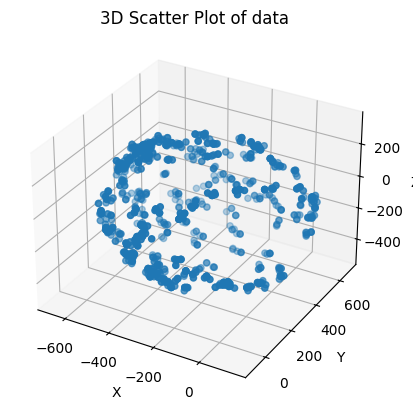

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(input_data[0], input_data[1], input_data[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of data')

plt.show()

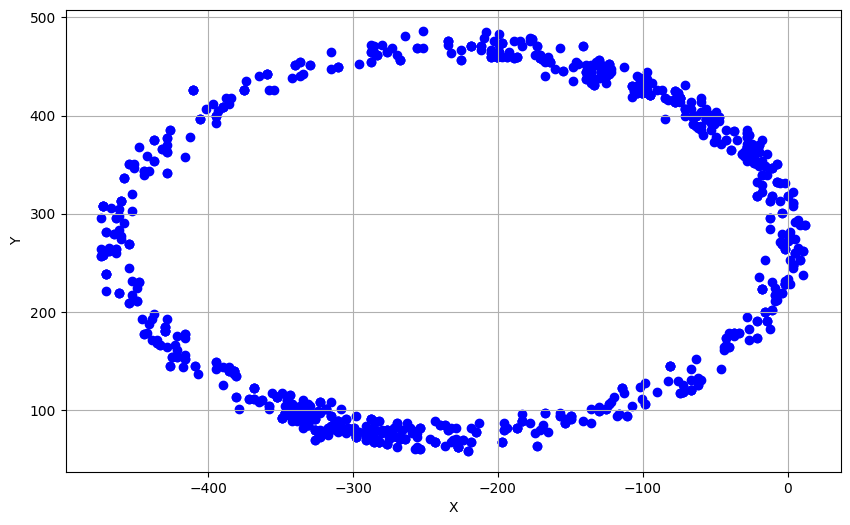

In [61]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.scatter(input_data[0], input_data[1], c='b', label = "XY")
ax.set_xlabel('X')
ax.set_ylabel('Y')
# ax.scatter(input_data[1], input_data[2], c='g', label = "YZ")
# ax.scatter(input_data[2], input_data[0], c='r', label = "ZX")
plt.grid()

plt.show()

[[-0.86758195 -0.49729424]
 [-0.49729424  0.86758195]]
[6983.48797275 6651.75136877]
[[-6058.74812751 -3307.87761043]
 [-3472.84831123  5770.93943707]]


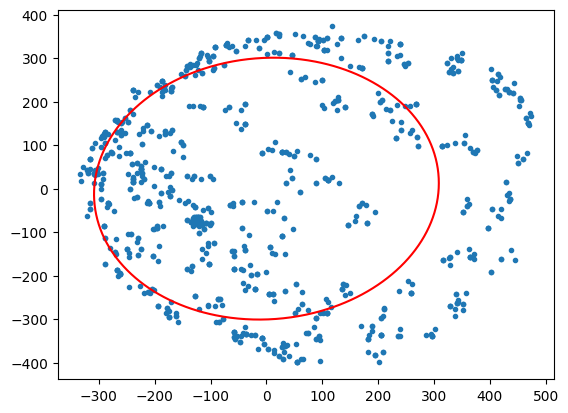

In [101]:
X=input_data[0]-np.mean(input_data[0])
Y=input_data[1]-np.mean(input_data[1])

U, S, V = np.linalg.svd(np.stack((X, Y)))

print(U)
print(S)
print(U.dot(np.diag(S)))

plt.plot(X, Y, '.')     # given points

tt = np.linspace(0, 2*np.pi, 1000)
circle = np.stack((np.cos(tt), np.sin(tt)))    # unit circle
transform = np.sqrt(2/array_size) * U.dot(np.diag(S))   # transformation matrix
fit = transform.dot(circle)
plt.plot(fit[0, :], fit[1, :], 'r')
plt.show()

In [123]:
# def elliptic_fitting_by_least_squares(noise_x, noise_y, f):
#     xi_sum = np.zeros((6, 6))
#     for i in range(len(noise_x)):
#         x = noise_x[i]
#         y = noise_y[i]
#         xi = np.array([[x**2, 2 * x * y, y**2, 2 * f * x, 2 * f * y, f * f]])
#         xi_sum += np.dot(xi.T, xi)

#     M = xi_sum / len(noise_x)
#     w, v = np.linalg.eig(M)
#     min_eig_vec = v[:, np.argmin(w)]

#     return min_eig_vec

# X=input_data[0]-np.mean(input_data[0])
# Y=input_data[1]-np.mean(input_data[1])

# f_0 = 20
# theta = elliptic_fitting_by_least_squares(X, Y, f_0)

# y = sympy.Symbol("y")
# fit_x = []
# fit_y = []
# for x in range(int(min(X)), int(max(X)), 5):
#     f = (
#         theta[0] * x**2
#         + 2 * theta[1] * x * y
#         + theta[2] * y**2
#         + 2 * f_0 * (theta[3] * x + theta[4] * y)
#         + f_0**2 * theta[5]
#     )
#     solutions = sympy.solve(f, y)
#     # print("solutions: ", solutions)
#     for y_ans in solutions:
#         if type(y_ans) == sympy.core.add.Add:
#             continue
#         fit_x.append(x)
#         fit_y.append(y_ans)


# M = np.array([  [theta[0], theta[1]],
#                 [theta[1], theta[2]]])
# n = np.array([[theta[3]],
#                 [theta[4]]])
# d = theta[5]

# M_1 = linalg.inv(M)
# b = np.real(-np.dot(M_1, n))
# A_1 = np.real(1 / np.sqrt(np.dot(n.T, np.dot(M_1, n)) - d) *
#                     linalg.sqrtm(M))

# print(M)
# print(M_1,)
# print(n)
# print(b)
# print(A_1)

# fit_x = []
# fit_y = []

# for i in range(array_size):
#     p = np.array([X[i],Y[i]]).reshape(2, 1)
#     p = np.dot(A_1, p - b)
#     fit_x.append([p[0][0]])
#     fit_y.append([p[1][0]])
#     # print(p)
#     # print(p[0][0])
#     # print(p[1][0])

# plt.scatter(
#     X, Y, marker="o", c="blue", s=20, alpha=0.4, label="Noise input"
# )
# plt.scatter(
#     fit_x, fit_y, marker="o", c="red", s=20, alpha=0.4, label="Least squares"
# )
# plt.legend()

[[3.25936648e-03 5.44964615e-06]
 [5.44964615e-06 3.65008804e-03]]
[[306.80885411  -0.45807106]
 [ -0.45807106 273.96667846]]
[[-0.01365288]
 [-0.0007979 ]]
[[4.18845872]
 [0.21234458]]
[[5.55236394e-02 4.51041847e-05]
 [4.51041847e-05 5.87574599e-02]]


[[-132.37718 -120.03718 -135.90718 ... -209.94718 -209.94718 -190.55718]
 [ -86.85734  -85.08734  -76.24734 ...  -33.78734  -33.78734  -39.09734]
 [ 288.84547  290.61547  299.45547 ...  341.91547  341.91547  336.60547]]
3


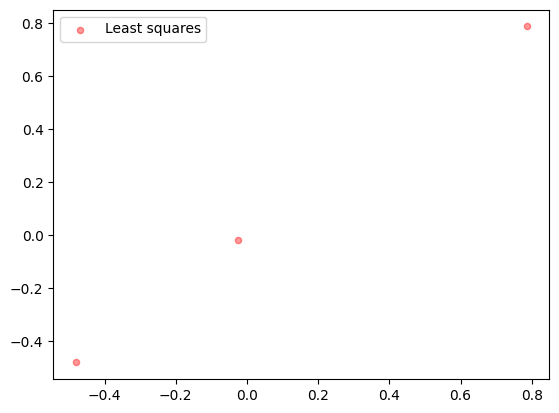

In [132]:
# from scipy import linalg

# def ellipsoid_fit(s):
#     ''' Estimate ellipsoid parameters from a set of points.

#         Parameters
#         ----------
#         s : array_like
#             The samples (M,N) where M=3 (x,y,z) and N=number of samples.

#         Returns
#         -------
#         M, n, d : array_like, array_like, float
#             The ellipsoid parameters M, n, d.

#         References
#         ----------
#         .. [1] Qingde Li; Griffiths, J.G., "Least squares ellipsoid specific
#             fitting," in Geometric Modeling and Processing, 2004.
#             Proceedings, vol., no., pp.335-340, 2004
#     '''

#     # D (samples)
#     D = np.array([s[0]**2., s[1]**2., s[2]**2.,
#                     2.*s[1]*s[2], 2.*s[0]*s[2], 2.*s[0]*s[1],
#                     2.*s[0], 2.*s[1], 2.*s[2], np.ones_like(s[0])])

#     # S, S_11, S_12, S_21, S_22 (eq. 11)
#     S = np.dot(D, D.T)
#     S_11 = S[:6,:6]
#     S_12 = S[:6,6:]
#     S_21 = S[6:,:6]
#     S_22 = S[6:,6:]

#     # C (Eq. 8, k=4)
#     C = np.array([[-1,  1,  1,  0,  0,  0],
#                     [ 1, -1,  1,  0,  0,  0],
#                     [ 1,  1, -1,  0,  0,  0],
#                     [ 0,  0,  0, -4,  0,  0],
#                     [ 0,  0,  0,  0, -4,  0],
#                     [ 0,  0,  0,  0,  0, -4]])

#     # v_1 (eq. 15, solution)
#     E = np.dot(linalg.inv(C),
#                 S_11 - np.dot(S_12, np.dot(linalg.inv(S_22), S_21)))

#     E_w, E_v = np.linalg.eig(E)

#     v_1 = E_v[:, np.argmax(E_w)]
#     if v_1[0] < 0: v_1 = -v_1

#     # v_2 (eq. 13, solution)
#     v_2 = np.dot(np.dot(-np.linalg.inv(S_22), S_21), v_1)

#     # quadric-form parameters
#     M = np.array([[v_1[0], v_1[3], v_1[4]],
#                     [v_1[3], v_1[1], v_1[5]],
#                     [v_1[4], v_1[5], v_1[2]]])
#     n = np.array([[v_2[0]],
#                     [v_2[1]],
#                     [v_2[2]]])
#     d = v_2[3]

#     return M, n, d

# X=input_data[0]-np.mean(input_data[0])
# Y=input_data[1]-np.mean(input_data[1])
# Z=input_data[1]-np.mean(input_data[2])

# s = np.array([X,Y,Z])

# print(s)
# print(len(s))

# M, n, d = ellipsoid_fit(s)

# # calibration parameters
# # note: some implementations of sqrtm return complex type, taking real
# M_1 = linalg.inv(M)
# b = np.real(-np.dot(M_1, n))
# A_1 = np.real(1 / np.sqrt(np.dot(n.T, np.dot(M_1, n)) - d) *
#                     linalg.sqrtm(M))

# # print(M_1,b,A_1)

# updated_s = []
# st= s.T
# for i in range(array_size):
#     p = np.array(st[i]).reshape(3, 1)
#     p = np.dot(A_1, p - b)
#     updated_s.append(p.reshape(1, 3)[0])

# plt.scatter(
#     X, Y, marker="o", c="blue", s=20, alpha=0.4, label="Noise input"
# )
# plt.scatter(
#     updated_s[0], updated_s[1], marker="o", c="red", s=20, alpha=0.4, label="Least squares"
# )
# plt.legend()

Fitted parameters:
a, b, c, d, e, f = [-6.73132204e-01  1.55126372e-02 -7.39359449e-01  1.11360303e+02
  5.87403461e+00  6.55854116e+04]
x0, y0, ap, bp, e, phi =  82.77378113871063 4.840726836441445 323.1721588727525 307.9668128682162 0.30312845996747473 0.11504271029976465


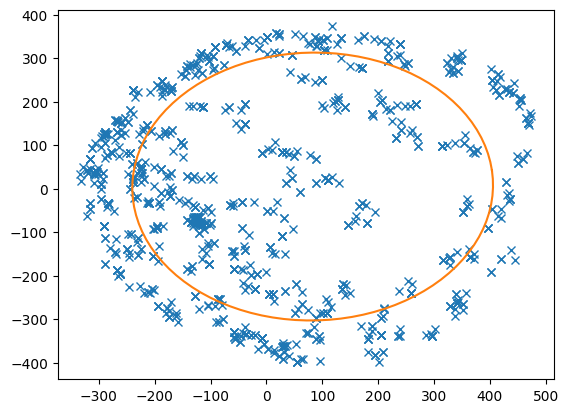

In [130]:
import numpy as np
import matplotlib.pyplot as plt


def fit_ellipse(x, y):
    """

    Fit the coefficients a,b,c,d,e,f, representing an ellipse described by
    the formula F(x,y) = ax^2 + bxy + cy^2 + dx + ey + f = 0 to the provided
    arrays of data points x=[x1, x2, ..., xn] and y=[y1, y2, ..., yn].

    Based on the algorithm of Halir and Flusser, "Numerically stable direct
    least squares fitting of ellipses'.


    """

    D1 = np.vstack([x**2, x*y, y**2]).T
    D2 = np.vstack([x, y, np.ones(len(x))]).T
    S1 = D1.T @ D1
    S2 = D1.T @ D2
    S3 = D2.T @ D2
    T = -np.linalg.inv(S3) @ S2.T
    M = S1 + S2 @ T
    C = np.array(((0, 0, 2), (0, -1, 0), (2, 0, 0)), dtype=float)
    M = np.linalg.inv(C) @ M
    eigval, eigvec = np.linalg.eig(M)
    con = 4 * eigvec[0]* eigvec[2] - eigvec[1]**2
    ak = eigvec[:, np.nonzero(con > 0)[0]]
    return np.concatenate((ak, T @ ak)).ravel()


def cart_to_pol(coeffs):
    """

    Convert the cartesian conic coefficients, (a, b, c, d, e, f), to the
    ellipse parameters, where F(x, y) = ax^2 + bxy + cy^2 + dx + ey + f = 0.
    The returned parameters are x0, y0, ap, bp, e, phi, where (x0, y0) is the
    ellipse centre; (ap, bp) are the semi-major and semi-minor axes,
    respectively; e is the eccentricity; and phi is the rotation of the semi-
    major axis from the x-axis.

    """

    # We use the formulas from https://mathworld.wolfram.com/Ellipse.html
    # which assumes a cartesian form ax^2 + 2bxy + cy^2 + 2dx + 2fy + g = 0.
    # Therefore, rename and scale b, d and f appropriately.
    a = coeffs[0]
    b = coeffs[1] / 2
    c = coeffs[2]
    d = coeffs[3] / 2
    f = coeffs[4] / 2
    g = coeffs[5]

    den = b**2 - a*c
    if den > 0:
        raise ValueError('coeffs do not represent an ellipse: b^2 - 4ac must'
                         ' be negative!')

    # The location of the ellipse centre.
    x0, y0 = (c*d - b*f) / den, (a*f - b*d) / den

    num = 2 * (a*f**2 + c*d**2 + g*b**2 - 2*b*d*f - a*c*g)
    fac = np.sqrt((a - c)**2 + 4*b**2)
    # The semi-major and semi-minor axis lengths (these are not sorted).
    ap = np.sqrt(num / den / (fac - a - c))
    bp = np.sqrt(num / den / (-fac - a - c))

    # Sort the semi-major and semi-minor axis lengths but keep track of
    # the original relative magnitudes of width and height.
    width_gt_height = True
    if ap < bp:
        width_gt_height = False
        ap, bp = bp, ap

    # The eccentricity.
    r = (bp/ap)**2
    if r > 1:
        r = 1/r
    e = np.sqrt(1 - r)

    # The angle of anticlockwise rotation of the major-axis from x-axis.
    if b == 0:
        phi = 0 if a < c else np.pi/2
    else:
        phi = np.arctan((2.*b) / (a - c)) / 2
        if a > c:
            phi += np.pi/2
    if not width_gt_height:
        # Ensure that phi is the angle to rotate to the semi-major axis.
        phi += np.pi/2
    phi = phi % np.pi

    return x0, y0, ap, bp, e, phi


def get_ellipse_pts(params, npts=100, tmin=0, tmax=2*np.pi):
    """
    Return npts points on the ellipse described by the params = x0, y0, ap,
    bp, e, phi for values of the parametric variable t between tmin and tmax.

    """

    x0, y0, ap, bp, e, phi = params
    # A grid of the parametric variable, t.
    t = np.linspace(tmin, tmax, npts)
    x = x0 + ap * np.cos(t) * np.cos(phi) - bp * np.sin(t) * np.sin(phi)
    y = y0 + ap * np.cos(t) * np.sin(phi) + bp * np.sin(t) * np.cos(phi)
    return x, y


if __name__ == '__main__':
    X=input_data[0]-np.mean(input_data[0])
    Y=input_data[1]-np.mean(input_data[1])
    coeffs = fit_ellipse(X, Y)

    print('Fitted parameters:')
    print('a, b, c, d, e, f =', coeffs)
    x0, y0, ap, bp, e, phi = cart_to_pol(coeffs)
    print('x0, y0, ap, bp, e, phi = ', x0, y0, ap, bp, e, phi)

    plt.plot(X, Y, 'x')     # given points

    x, y = get_ellipse_pts((x0, y0, ap, bp, e, phi))
    plt.plot(x, y)

    plt.show()

    rot = round(phi / (math.pi / 2.0))
    rotation = -(phi - rot * math.pi / 2.0)

    def correctdata(row):
        x = row["x"] - x0
        y = row["y"] - y0
        return [x * np.cos(rotation) - y * np.sin(rotation),
                (x * np.sin(rotation) + y * np.cos(rotation)) * rat]

    res = rawdata.apply(correctdata, axis=1, result_type='expand')
    rawdata["xcorrected"] = res[0]
    rawdata["ycorrected"] = res[1]

    math.degrees(phi), math.degrees(rotation)

[[ -97433.18069421 8455739.76323513]
 [8455739.76323513  -88705.71921207]] [  588.94785559 11165.30902135] 65585.41164610682


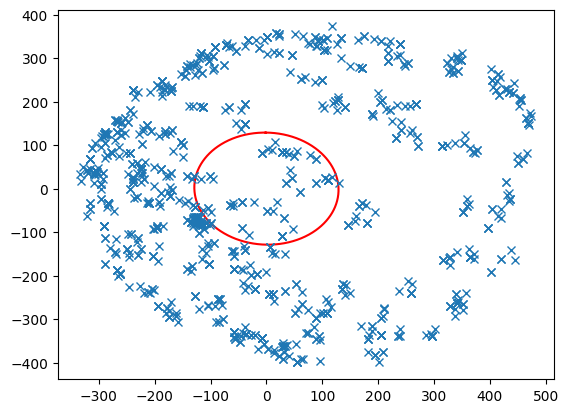

In [165]:
# tt = np.linspace(0, 2*np.pi, 1000)
# circle = np.stack((np.cos(tt), np.sin(tt)))    # unit circle

# X=input_data[0]-np.mean(input_data[0])
# Y=input_data[1]-np.mean(input_data[1])
# theta = fit_ellipse(X, Y)

# d = theta[5]
# M = d/np.array([  [theta[0], theta[1]/2],
#                 [theta[1]/2, theta[2]]])
# n = d/np.array([theta[3], theta[4]])

# print(M,n,d)

# fit = M.dot(circle) + n.dot(circle)
# plt.plot(fit[0, :]/d, fit[1, :]/d, 'r')
# plt.plot(X, Y, 'x')     # given points
# # plt.plot(circle[0, :], circle[1, :], 'b')
# plt.show()

In [ ]:
# tt = np.linspace(0, 2*np.pi, 1000)
# circle = np.stack((np.cos(tt), np.sin(tt)))    # unit circle

# theta = [0,1,1,0,1,1]
# # print(circle)

# M = np.array([  [theta[0], theta[1]/2],
#                 [theta[1]/2, theta[2]]])
# n = np.array([theta[3], theta[4]])
# # d = theta[5]

# # circle = circle.dot(M)

# # transform = np.sqrt(2/array_size) * U.dot(np.diag(S))   # transformation matrix
# # print(transform)
# fit = M.dot(circle) + n.dot(circle)
# plt.plot(fit[0, :], fit[1, :], 'r')
# plt.plot(circle[0, :], circle[1, :], 'b')
# plt.show()